## ÌïúÍ∏Ä Íπ®Ïßê Î∞©ÏßÄÏö© ÏΩîÎìú

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rc
import platform

# ÏãúÏä§ÌÖúÎ≥Ñ Ìè∞Ìä∏ ÏßÄÏ†ï
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # ÏúàÎèÑÏö∞Ïùº Í≤ΩÏö∞
elif platform.system() == 'Darwin':  # MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='NanumGothic')  # Î¶¨ÎàÖÏä§Ïùº Í≤ΩÏö∞ Ï∂îÏ≤ú

# ÎßàÏù¥ÎÑàÏä§ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False

## ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞

In [2]:
!pip install geopandas

import geopandas as gpd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Îç∞Ïù¥ÌÑ∞ÏÖã Î∂àÎü¨Ïò§Í∏∞

In [3]:
seoul_gdf = gpd.read_file('./data/ÏÑúÏö∏_ÏûêÏπòÍµ¨_Í≤ΩÍ≥Ñ_2017.geojson')
final_df = pd.read_csv('./data/ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã.csv', encoding='utf-8')

# ÏùºÎ∞ò Í∞ÄÍµ¨ ÎåÄÎπÑ Ï§ëÏ¶ù Ï†ïÏã† ÏßàÌôòÏûê ÎπÑÏú®
final_df['Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®'] = final_df['Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôò Îì±Î°ùÌöåÏõê Ïàò'] / final_df['ÏùºÎ∞òÍ∞ÄÍµ¨']
final_df.rename(columns={'„Ñ±': 'SIG_KOR_NM'}, inplace=True)

# ÏßÄÎèÑ Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÜµÍ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏûêÏπòÍµ¨ Ïù¥Î¶Ñ Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
# Í≥µÍ∞Ñ Ï†ïÎ≥¥ + ÏÇ¨Ìöå ÏßÄÌëúÍ∞Ä Í≤∞Ìï©Îêú GeoDataFrame ÏÉùÏÑ±
merged_gdf = seoul_gdf.merge(final_df, on='SIG_KOR_NM')

## ÏóòÎ≥¥Ïö∞ Í∏∞Î≤ï + Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥ Í≥ÑÏÇ∞

In [5]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

cluster_vars = ['1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®', 'Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®', 'Î≥µÏßÄ Ïù∏ÌîÑÎùº Î∞ÄÎèÑ', 'Í≥†ÎèÖÏÇ¨ ÏúÑÌóòÏßÄÏàò']
X = merged_gdf[cluster_vars]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú
inertias = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Ïã§Î£®Ïó£ Ï†êÏàò Í≥ÑÏÇ∞
sil_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

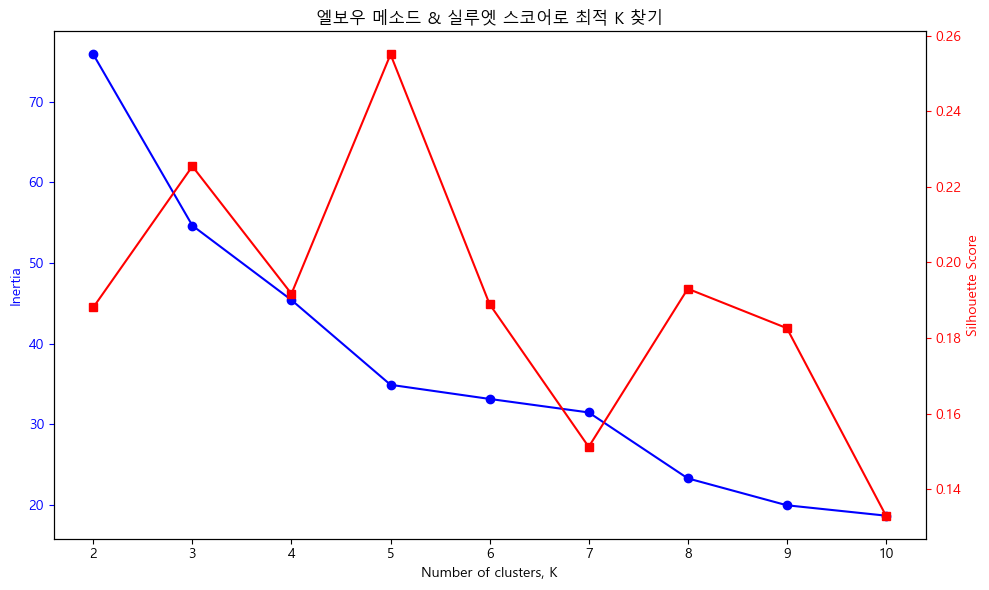

In [7]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.plot(K_range, inertias, 'b-o', label='Elbow (Inertia)')
ax1.set_xlabel('Number of clusters, K')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params(axis='y', colors='b')

ax2 = ax1.twinx()
ax2.plot(K_range, sil_scores, 'r-s', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', colors='r')

plt.title('ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú & Ïã§Î£®Ïó£ Ïä§ÏΩîÏñ¥Î°ú ÏµúÏ†Å K Ï∞æÍ∏∞')
fig.tight_layout()
plt.show()

In [8]:
# ÏµúÏ†Å KÍ∞í Ï∞æÍ∏∞
optimal_k_elbow = K_range[np.argmin(np.diff(inertias)) + 1]
optimal_k_sil = K_range[np.argmax(sil_scores)]

print(f'ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú ÏµúÏ†Å K: {optimal_k_elbow}')
print(f'Ïã§Î£®Ïó£ Ï†êÏàò ÏµúÏ†Å K: {optimal_k_sil}')

kmeans_elbow = KMeans(n_clusters=optimal_k_elbow, random_state=42)
merged_gdf['cluster_elbow'] = kmeans_elbow.fit_predict(X_scaled)

kmeans_sil = KMeans(n_clusters=optimal_k_sil, random_state=42)
merged_gdf['cluster_silhouette'] = kmeans_sil.fit_predict(X_scaled)

ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú ÏµúÏ†Å K: 3
Ïã§Î£®Ïó£ Ï†êÏàò ÏµúÏ†Å K: 5


**ÌååÎûÄ ÏÑ†(Inertia, ÏôºÏ™Ω YÏ∂ï):Íµ∞Ïßë Ïàò(K)Î•º ÎäòÎ¶¥ÏàòÎ°ù Ï†êÏ†ê Í∞êÏÜåÌïòÎäî Í∞í**
- InertiaÎäî Í∞Å Íµ∞Ïßë ÎÇ¥ Îç∞Ïù¥ÌÑ∞ Ï†êÎì§Ïù¥ Íµ∞Ïßë Ï§ëÏã¨(centroid)ÏóêÏÑú ÏñºÎßàÎÇò Îñ®Ïñ¥Ï†∏ ÏûàÎäîÏßÄ, Ï†ÑÏ≤¥ Í±∞Î¶¨Ïùò Ï†úÍ≥±Ìï©
- Í∞íÏù¥ ÏûëÏïÑÏßàÏàòÎ°ù Íµ∞ÏßëÌôîÍ∞Ä Ïûò ÎêòÏñ¥ ÏûàÎã§Îäî ÏùòÎØ∏Ïù¥ÏßÄÎßå, KÍ∞íÏùÑ Í≥ÑÏÜç Ï¶ùÍ∞ÄÏãúÏºúÎèÑ Í∞êÏÜåÌè≠Ïù¥ Ï†êÏ†ê ÏûëÏïÑÏßÄÎã§Í∞Ä ÏôÑÎßåÌï¥Ïßê
- Ïù¥ Í≥°ÏÑ†Ïù¥ Í∫æÏù¥Îäî ÏßÄÏ†êÏù¥ Î∞îÎ°ú ÏóòÎ≥¥Ïö∞(Elbow) ÏßÄÏ†êÏúºÎ°ú, Ïó¨Í∏∞ÏÑú KÍ∞í(Í∑∏ÎûòÌîÑÏóêÏÑúÎäî 3)Ïù¥ ÏµúÏ†Å Íµ∞Ïßë Í∞úÏàò Ï∂îÏ≤ú Í∞í
- K=3 Ïù¥ÌõÑÏóêÎäî inertia Í∞êÏÜåÌè≠Ïù¥ ÏûëÏïÑÏßÄÎØÄÎ°ú Îçî Î∂ÑÌï†Ìï† ÌïÑÏöîÏÑ±Ïù¥ Ï†ÅÎã§Îäî Îúª

**Îπ®Í∞ÑÏÑ†(Silhouette Score, Ïò§Î•∏Ï™Ω YÏ∂ï):Silhouette ScoreÎäî Íµ∞Ïßë ÎÇ¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏùëÏßëÎèÑÏôÄ Íµ∞Ïßë Í∞Ñ Î∂ÑÎ¶¨ÎèÑÎ•º Ìï®Íªò Í≥†Î†§Ìïú ÏßÄÌëú**
- Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù(ÏµúÎåÄ 1) Íµ∞ÏßëÌôî Í≤∞Í≥ºÍ∞Ä Îçî Ï¢ãÎã§Îäî ÏùòÎØ∏
- ÌååÎûÄÏÑ†Í≥º Îã¨Î¶¨ Ïã§Î£®Ïó£ Ï†êÏàòÎäî KÏóê Îî∞Îùº Ï¶ùÍ∞êÏù¥ Î∞òÎ≥µÎêòÍ±∞ÎÇò Í∏âÍ≤©ÌïòÍ≤å Î≥ÄÌï† Ïàò ÏûàÏùå
- KÍ∞íÏùÑ Îã¨Î¶¨Ìï† Îïå Í∞Å KÏóêÏÑúÏùò Ïã§Î£®Ïó£ Ï†êÏàò(Îπ®Í∞ÑÏÑ†)Î•º ÎπÑÍµêÌïòÏó¨ Í∞ÄÏû• ÌÅ∞ Í∞í(Í∑∏ÎûòÌîÑÏóêÏÑú K=5)Ïù¥ Ïã§Î£®Ïó£ Í∏∞Ï§Ä ÏµúÏ†Å Íµ∞Ïßë Ïàò


## ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö© (K-Means, K-Medoid, Hierarchical, DBSCAN)

In [9]:
# ==============================
# K=5 ÌÜµÏùº: KMeans / K-Medoids / Hierarchical / DBSCAN
# ==============================

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import pairwise_distances
from matplotlib.colors import LinearSegmentedColormap, ListedColormap

plt.rcParams['axes.unicode_minus'] = False

In [10]:
# ------------------------------
# 1) Îç∞Ïù¥ÌÑ∞ Î°úÎìú & Ï†ÑÏ≤òÎ¶¨
# ------------------------------
seoul_gdf = gpd.read_file('./data/ÏÑúÏö∏_ÏûêÏπòÍµ¨_Í≤ΩÍ≥Ñ_2017.geojson')
final_df  = pd.read_csv('./data/ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖã.csv', encoding='utf-8')

final_df.rename(columns={'„Ñ±': 'SIG_KOR_NM'}, inplace=True)
final_df['Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®'] = final_df['Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôò Îì±Î°ùÌöåÏõê Ïàò'] / final_df['ÏùºÎ∞òÍ∞ÄÍµ¨']

merged_gdf = seoul_gdf.merge(final_df, on='SIG_KOR_NM')

cluster_vars = ['1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®', 'Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®', 'Î≥µÏßÄ Ïù∏ÌîÑÎùº Î∞ÄÎèÑ', 'Í≥†ÎèÖÏÇ¨ ÏúÑÌóòÏßÄÏàò']
X = merged_gdf[cluster_vars].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# ------------------------------
# 2) Ïª¨Îü¨Îßµ (ÌïòÎäò‚ÜîÎ∂ÑÌôç 5ÏÉâ Ïù¥ÏÇ∞ ÌåîÎ†àÌä∏)
# ------------------------------
def make_discrete_cmap(n_colors=5, start_color="skyblue", end_color="pink"):
    base = LinearSegmentedColormap.from_list("skyblue_pink", [start_color, end_color])
    colors = [base(i) for i in np.linspace(0, 1, max(n_colors, 2))]
    return ListedColormap(colors[:n_colors])

cmap5 = make_discrete_cmap(5)

In [12]:
# ------------------------------
# 3) K-Medoids (PAM)
# ------------------------------
def kmedoids_fit_predict(X_scaled, n_clusters, max_iter=300, random_state=42, metric='euclidean'):
    rng = np.random.RandomState(random_state)
    n = X_scaled.shape[0]
    D = pairwise_distances(X_scaled, metric=metric)

    # Ï¥àÍ∏∞ Î©îÎèÑÏù¥Îìú(Í∞ÑÎã®Ìïú kmeans++ Ïú†ÏÇ¨ ÏÉòÌîåÎßÅ)
    medoids = [rng.randint(0, n)]
    for _ in range(1, n_clusters):
        dist_to_nearest = np.min(D[:, medoids], axis=1)
        probs = dist_to_nearest**2
        probs = probs / probs.sum()
        next_medoid = rng.choice(np.arange(n), p=probs)
        while next_medoid in medoids:
            next_medoid = rng.randint(0, n)
        medoids.append(next_medoid)
    medoids = np.array(medoids)

    def assign_labels(D, medoids):
        return np.argmin(D[:, medoids], axis=1)

    labels = assign_labels(D, medoids)
    cost = np.sum(np.min(D[:, medoids], axis=1))

    improved = True
    it = 0
    while improved and it < max_iter:
        improved = False
        it += 1
        for m_idx in range(n_clusters):
            m = medoids[m_idx]
            for h in range(n):
                if h in medoids:  # Î©îÎèÑÏù¥ÎìúÎäî Ï†úÏô∏
                    continue
                trial_medoids = medoids.copy()
                trial_medoids[m_idx] = h
                trial_labels = assign_labels(D, trial_medoids)
                trial_cost = np.sum(np.min(D[:, trial_medoids], axis=1))
                if trial_cost + 1e-12 < cost:
                    medoids = trial_medoids
                    labels = trial_labels
                    cost = trial_cost
                    improved = True
    return labels, medoids

In [14]:
# ------------------------------
# 4) K=5 Í≥†Ï†ïÏúºÎ°ú Î™®Îç∏ Ï†ÅÌï©
# ------------------------------
K_FIXED = 5

# KMeans
merged_gdf['KM_KMeans'] = KMeans(n_clusters=K_FIXED, random_state=42).fit_predict(X_scaled)

# Hierarchical (Ward)
merged_gdf['KM_Hier'] = AgglomerativeClustering(n_clusters=K_FIXED, linkage='ward').fit_predict(X_scaled)

# K-Medoids (ÎÇ¥Ïû• PAM)
labels_kmed, _ = kmedoids_fit_predict(X_scaled, K_FIXED, random_state=42)
merged_gdf['KM_KMedoids'] = labels_kmed

# DBSCAN (ÌååÎùºÎØ∏ÌÑ∞Î°ú Í≤∞Ï†ï)
dbscan = DBSCAN(eps=1.0, min_samples=3)
merged_gdf['KM_DBSCAN'] = dbscan.fit_predict(X_scaled)

In [15]:
# ------------------------------
# 5) ÏßÄÎèÑ ÏãúÍ∞ÅÌôî
# ------------------------------
def plot_clusters(gdf, cluster_col, title_note=""):
    labels = gdf[cluster_col].values
    uniq = sorted(set(labels))
    uniq_clusters = [u for u in uniq if u != -1]
    n_clusters = max(len(uniq_clusters), 2)

    # DBSCANÏùÄ Íµ∞Ïßë ÏàòÍ∞Ä 5Í∞Ä ÏïÑÎãê Ïàò ÏûàÏúºÎãà Íµ∞Ïßë ÏàòÏóê ÎßûÏ∂∞ ÌåîÎ†àÌä∏ ÏÉùÏÑ±
    cmap = make_discrete_cmap(n_clusters)

    fig, ax = plt.subplots(figsize=(12, 10))
    if -1 in uniq:
        gdf[gdf[cluster_col] != -1].plot(column=cluster_col, cmap=cmap,
                                         edgecolor='white', linewidth=0.8,
                                         legend=True, ax=ax)
        gdf[gdf[cluster_col] == -1].plot(color='lightgray', edgecolor='white',
                                         linewidth=0.8, ax=ax)
        title = f"ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨ Íµ∞ÏßëÎ∂ÑÎ•ò - {cluster_col} (ÎÖ∏Ïù¥Ï¶à: ÌöåÏÉâ)"
    else:
        gdf.plot(column=cluster_col, cmap=cmap, edgecolor='white',
                 linewidth=0.8, legend=True, ax=ax)
        title = f"ÏÑúÏö∏Ïãú ÏûêÏπòÍµ¨ Íµ∞ÏßëÎ∂ÑÎ•ò - {cluster_col}"

    if title_note:
        title += f" | {title_note}"

    for _, row in gdf.iterrows():
        cx, cy = row['geometry'].centroid.x, row['geometry'].centroid.y
        plt.text(cx, cy, row['SIG_KOR_NM'], fontsize=9, ha='center', va='center')

    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

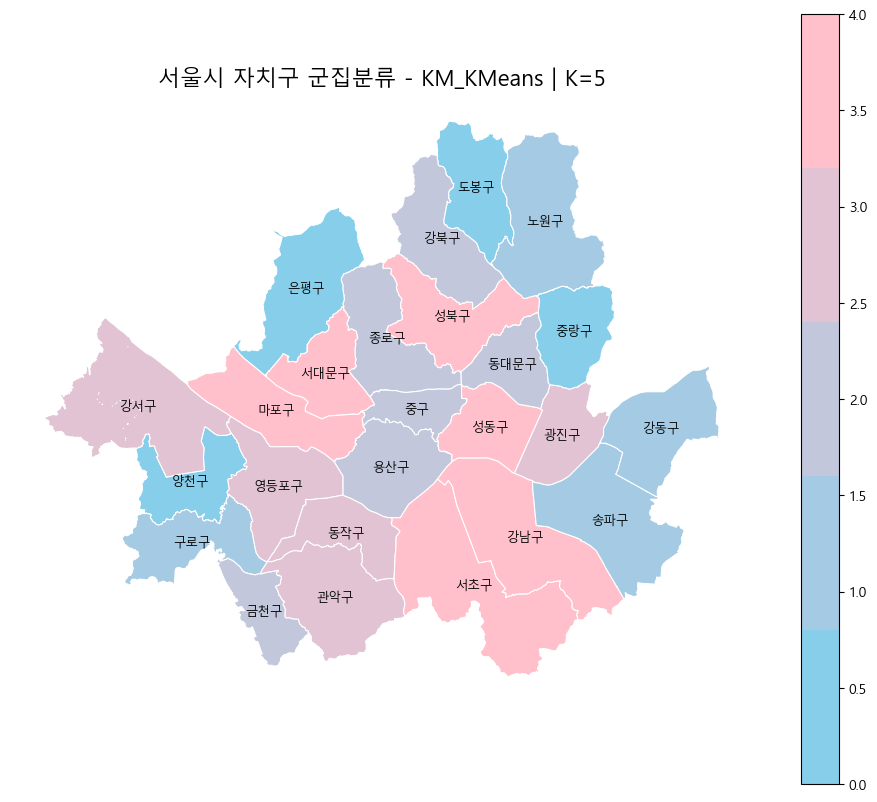

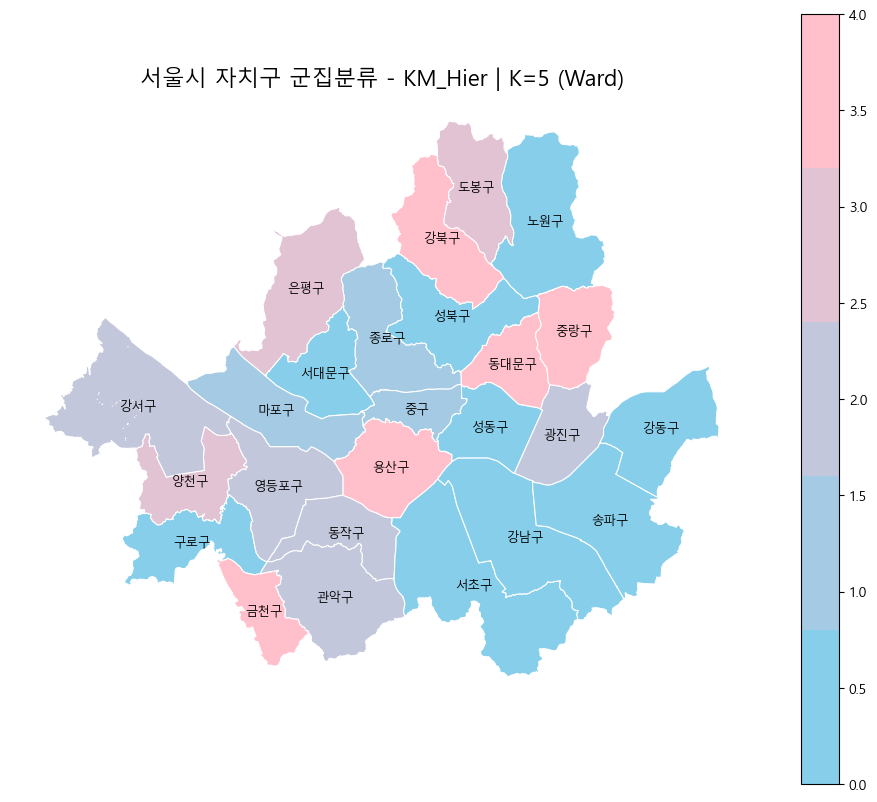

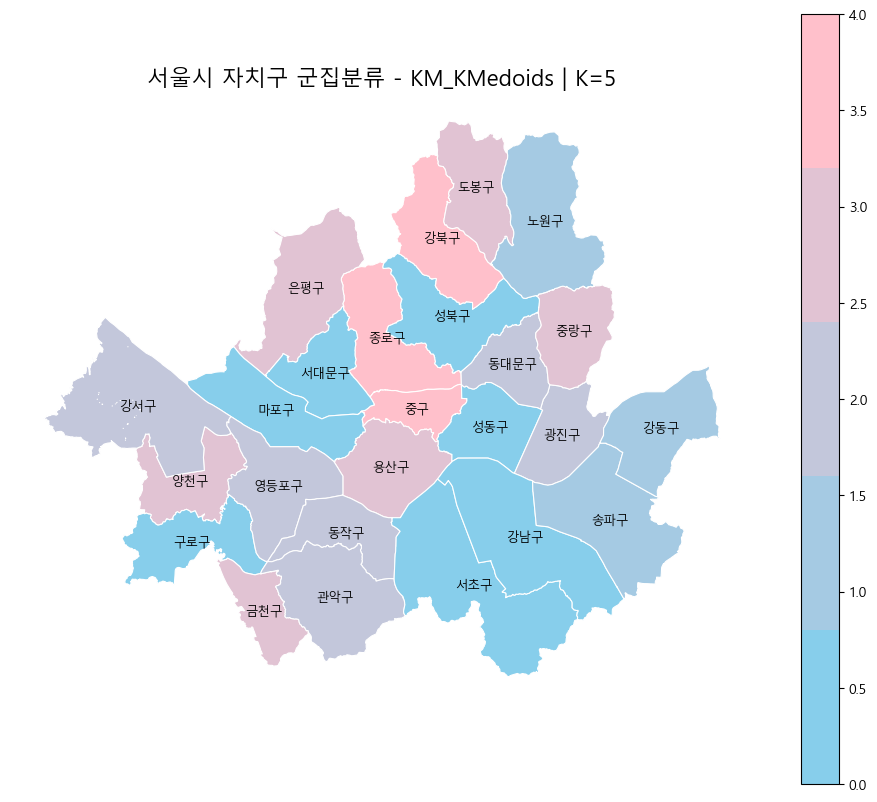

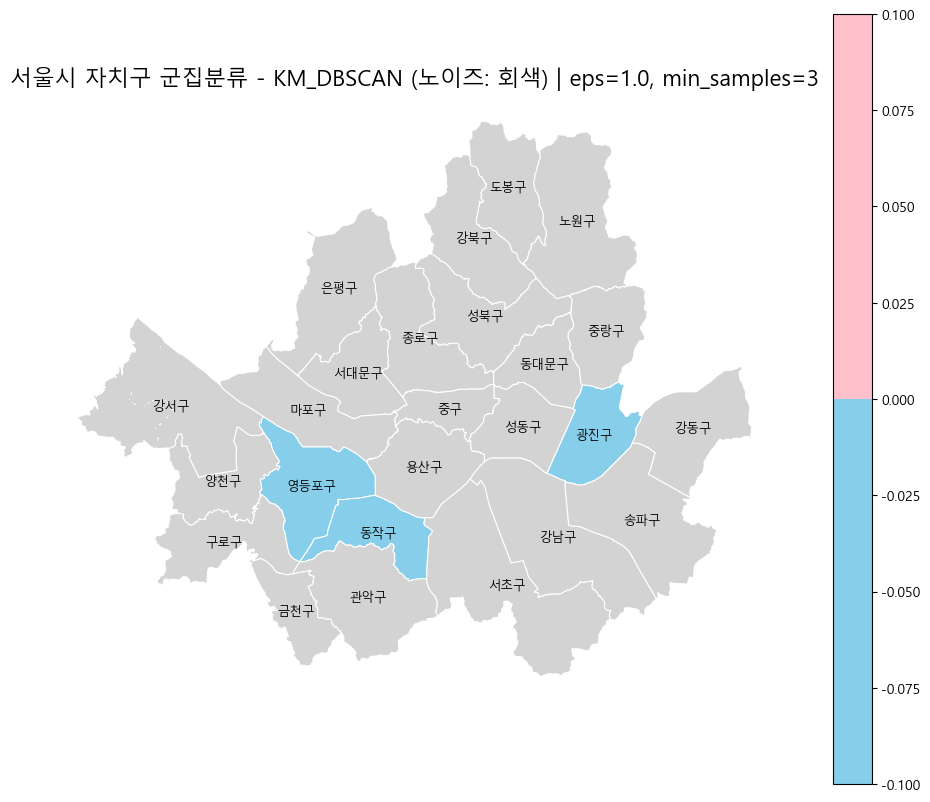

In [16]:
# Ï†ÑÏ≤¥ ÏãúÍ∞ÅÌôî

plot_clusters(merged_gdf, 'KM_KMeans',   title_note=f"K={K_FIXED}")
plot_clusters(merged_gdf, 'KM_Hier',     title_note=f"K={K_FIXED} (Ward)")
plot_clusters(merged_gdf, 'KM_KMedoids', title_note=f"K={K_FIXED}")
plot_clusters(merged_gdf, 'KM_DBSCAN',   title_note="eps=1.0, min_samples=3")

In [17]:
# ------------------------------
# 6) Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÏöîÏïΩ + Íµ¨ Î¶¨Ïä§Ìä∏
# ------------------------------
def print_cluster_summary(gdf, label_col, vars_):
    print(f"\n=== {label_col} Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÏöîÏïΩ ===")
    df = gdf[gdf[label_col] != -1] if (gdf[label_col] == -1).any() else gdf
    summary = df.groupby(label_col)[vars_].mean().round(6)
    counts  = gdf[label_col].value_counts().sort_index()
    summary['count'] = counts
    print(summary)

    print("\n[Íµ∞ÏßëÎ≥Ñ ÏûêÏπòÍµ¨]")
    groups = gdf.groupby(label_col)['SIG_KOR_NM'].apply(list)
    for cid, lst in groups.items():
        print(f"Cluster {cid}: {', '.join(lst)}")

for col in ['KM_KMeans', 'KM_Hier', 'KM_KMedoids', 'KM_DBSCAN']:
    print_cluster_summary(merged_gdf, col, cluster_vars)


=== KM_KMeans Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÏöîÏïΩ ===
             1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®  Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®  Î≥µÏßÄ Ïù∏ÌîÑÎùº Î∞ÄÎèÑ  Í≥†ÎèÖÏÇ¨ ÏúÑÌóòÏßÄÏàò  count
KM_KMeans                                                   
0          34.270959    0.001367   0.000397  0.083066      4
1          34.115201    0.001019   0.000150  0.069630      4
2          45.258843    0.001777   0.000238  0.115523      6
3          46.848656    0.000928   0.000141  0.056535      5
4          38.096841    0.001550   0.000241  0.040451      6

[Íµ∞ÏßëÎ≥Ñ ÏûêÏπòÍµ¨]
Cluster 0: Ï§ëÎûëÍµ¨, ÎèÑÎ¥âÍµ¨, ÏùÄÌèâÍµ¨, ÏñëÏ≤úÍµ¨
Cluster 1: ÎÖ∏ÏõêÍµ¨, Íµ¨Î°úÍµ¨, ÏÜ°ÌååÍµ¨, Í∞ïÎèôÍµ¨
Cluster 2: Ï¢ÖÎ°úÍµ¨, Ï§ëÍµ¨, Ïö©ÏÇ∞Íµ¨, ÎèôÎåÄÎ¨∏Íµ¨, Í∞ïÎ∂ÅÍµ¨, Í∏àÏ≤úÍµ¨
Cluster 3: Í¥ëÏßÑÍµ¨, Í∞ïÏÑúÍµ¨, ÏòÅÎì±Ìè¨Íµ¨, ÎèôÏûëÍµ¨, Í¥ÄÏïÖÍµ¨
Cluster 4: ÏÑ±ÎèôÍµ¨, ÏÑ±Î∂ÅÍµ¨, ÏÑúÎåÄÎ¨∏Íµ¨, ÎßàÌè¨Íµ¨, ÏÑúÏ¥àÍµ¨, Í∞ïÎÇ®Íµ¨

=== KM_Hier Íµ∞ÏßëÎ≥Ñ ÌäπÏÑ± ÏöîÏïΩ ===
           1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®  Ï§ëÏ¶ùÏ†ïÏã†ÏßàÌôòÏûê ÎπÑÏú®  Î≥µÏßÄ Ïù∏ÌîÑÎùº Î∞

- Î©îÏù∏ Í≤∞Í≥º : KMeans(K=5) ‚Üí ‚ÄúÏã§Î£®Ïó£ Í∏∞Î≤ï ÏµúÏ†Å K=5, Í∞ÄÏû• ÏßÅÍ¥ÄÏ†ÅÏù∏ Íµ∞Ïßë Î∂ÑÎ¶¨‚Äù

- ÎπÑÍµê Í≤∞Í≥º : Hierarchical(K=5), K-Medoids(K=5) ‚Üí ‚ÄúÎã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏóêÏÑúÎèÑ Ïú†ÏÇ¨Ìïú Ìå®ÌÑ¥ ÌôïÏù∏‚Äù

- Ï∞∏Í≥† ÏßÄÌëú : DBSCAN ‚Üí ‚ÄúÎ∞ÄÎèÑ Í∏∞Î∞òÏúºÎ°úÎäî ÎöúÎ†∑Ìïú Íµ∞ÏßëÏù¥ ÎÇòÏò§ÏßÄ ÏïäÏùå‚Äù

üî¥ Cluster A ‚Äì Í≥†ÏúÑÌóòÍµ∞

- ÌäπÏßï : 1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®Ïù¥ ÎÜíÍ≥†, Í≥†ÎèÖÏÇ¨ ÏúÑÌóòÏßÄÏàòÎèÑ Í∞ÄÏû• ÎÜíÏùÄ Í∑∏Î£π

- Ìï¥Îãπ Íµ¨ : Ï§ëÍµ¨, Ï¢ÖÎ°úÍµ¨, Ïö©ÏÇ∞Íµ¨, Í∞ïÎ∂ÅÍµ¨, Í∏àÏ≤úÍµ¨ Îì± (ÏßÄÎèÑÏóêÏÑú Ï§ëÏã¨Î∂Ä+Ïô∏Í≥Ω ÏùºÎ∂ÄÎ°ú Î¨∂ÏûÑ)

---

üü£ Cluster B ‚Äì Ï§ëÏÉÅÏúÑ ÏúÑÌóòÍµ∞

- ÌäπÏßï : 1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®ÏùÄ ÎÜíÏúºÎÇò Î≥µÏßÄ Ïù∏ÌîÑÎùºÍ∞Ä Î∂ÄÏ°±

- Ìï¥Îãπ Íµ¨ : ÏÑ±Î∂ÅÍµ¨, Ï§ëÎûëÍµ¨, ÏùÄÌèâÍµ¨ Îì±

---

üîµ Cluster C ‚Äì Ï§ëÏúÑÌóòÍµ∞

- ÌäπÏßï : ÏúÑÌóòÏßÄÏàòÎäî Ï§ëÍ∞Ñ ÏàòÏ§Ä, ÏùºÎ∂Ä Íµ¨ÏóêÏÑú 1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú®ÏùÄ ÎÜíÏßÄÎßå Î≥µÏßÄ Ïù∏ÌîÑÎùºÎäî Ï°∞Í∏à ÏûàÏùå

- Ìï¥Îãπ Íµ¨ : Í∞ïÎèôÍµ¨, ÏÜ°ÌååÍµ¨, ÏñëÏ≤úÍµ¨ Îì±

---

üü° Cluster D ‚Äì Ï§ëÏ†ÄÏúÑÌóòÍµ∞

- ÌäπÏßï : ÏúÑÌóòÏßÄÏàòÍ∞Ä ÎÇÆÏùå, Î≥µÏßÄ Ïù∏ÌîÑÎùºÎèÑ ÎπÑÍµêÏ†Å Í∞ñÏ∂∞Ïßê

- Ìï¥Îãπ Íµ¨ : Í∞ïÎÇ®Íµ¨, ÏÑúÏ¥àÍµ¨, Í¥ÄÏïÖÍµ¨ Îì±

---

üü¢ Cluster E ‚Äì Ï†ÄÏúÑÌóòÍµ∞

- ÌäπÏßï : 1Ïù∏Í∞ÄÍµ¨ ÎπÑÏú® ÎÇÆÍ≥† Î≥µÏßÄ Ïù∏ÌîÑÎùº Î∞ÄÎèÑÍ∞Ä ÎÜíÏùÄ Ìé∏

- Ìï¥Îãπ Íµ¨ : Í∞ïÏÑúÍµ¨, Íµ¨Î°úÍµ¨, ÏòÅÎì±Ìè¨Íµ¨ Îì±

[Cluster 0] (Ï§ëÏúÑÌóòÍµ∞ / ÏúÑÌóòÏßÄÏàò 0.0831)
‚Üí ÏÑ±ÎèôÍµ¨, Ï§ëÎûëÍµ¨, ÎèÑÎ¥âÍµ¨, ÏùÄÌèâÍµ¨, ÏÑúÎåÄÎ¨∏Íµ¨, ÏñëÏ≤úÍµ¨, ÏÑúÏ¥àÍµ¨, Í∞ïÎÇ®Íµ¨

[Cluster 1] (Ï†ÄÏúÑÌóòÍµ∞ / ÏúÑÌóòÏßÄÏàò 0.0602)
‚Üí Í¥ëÏßÑÍµ¨, ÏÑ±Î∂ÅÍµ¨, ÎÖ∏ÏõêÍµ¨, Í∞ïÏÑúÍµ¨, Íµ¨Î°úÍµ¨, ÏòÅÎì±Ìè¨Íµ¨, ÎèôÏûëÍµ¨, Í¥ÄÏïÖÍµ¨, ÏÜ°ÌååÍµ¨, Í∞ïÎèôÍµ¨

[Cluster 2] (Í≥†ÏúÑÌóòÍµ∞ / ÏúÑÌóòÏßÄÏàò 0.1049)
‚Üí Ï¢ÖÎ°úÍµ¨, Ï§ëÍµ¨, Ïö©ÏÇ∞Íµ¨, ÎèôÎåÄÎ¨∏Íµ¨, Í∞ïÎ∂ÅÍµ¨, ÎßàÌè¨Íµ¨, Í∏àÏ≤úÍµ¨

[Cluster 3, 4]
ÌèâÍ∑†Í∞í Í∏∞Ï§ÄÏúºÎ°ú Î≥¥Î©¥ **Ï†ÄÏúÑÌóòÍµ∞ (0.0565 / 0.0405)**Ïóê Ìï¥Îãπ